In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("results.csv")
ds.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
ds

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42079,2021-03-31,Andorra,Hungary,1,4,FIFA World Cup qualification,Andorra la Vella,Andorra,False
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False
42081,2021-03-31,Armenia,Romania,3,2,FIFA World Cup qualification,Yerevan,Armenia,False
42082,2021-03-31,Germany,North Macedonia,1,2,FIFA World Cup qualification,Duisburg,Germany,False


In [6]:
def win_rec(home_score, home_team,away_score,away_team):
    if home_score > away_score : return home_team
    elif home_score < away_score : return away_team
    else: pass
def los_rec(home_score, home_team,away_score,away_team):
    if home_score > away_score : return away_team
    elif home_score < away_score : return home_team
    else: pass

ds['winner'] = ds.apply(lambda x : win_rec(x['home_score'],x['home_team'],x['away_score'],x['away_team']),axis=1)
ds['loser'] = ds.apply(lambda x : los_rec(x['home_score'],x['home_team'],x['away_score'],x['away_team']),axis=1)

display(ds.shape)
ds.head()

(42084, 11)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,None,None
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,None,None
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


In [7]:
ds['winner'].value_counts().head()

Brazil       629
England      580
Germany      560
Argentina    529
Sweden       506
Name: winner, dtype: int64

In [8]:
ds['winner'].isnull().sum()

9700

In [9]:
ds['loser'].value_counts().head()

Finland             404
Switzerland         348
Northern Ireland    338
Norway              331
Luxembourg          323
Name: loser, dtype: int64

In [37]:
def find_haway(r):
    if r['home_team'] == r['winner'] : return "Home"
    elif r['away_team'] == r['winner'] : return "Away"
    else : return "others"

ds["wTeams"] = ds.apply(find_haway,axis=1)
ds.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,loser,wTeams
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,None,None,others
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,None,None,others
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,Home


<AxesSubplot:ylabel='wTeams'>

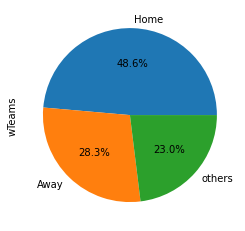

In [41]:

ds['wTeams'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False)

In [49]:
ds_sample1 = ds[['home_team','away_team']].groupby(['home_team','away_team']).size().reset_index(name='counts')
ds_sample2 = pd.DataFrame(columns = ['home_team','away_team','counts'])
ds_sample2['home_team'] = ds_sample1['away_team']
ds_sample2['away_team'] = ds_sample1['home_team']
ds_sample2['counts'] = ds_sample1['counts']
ds_sample3=ds_sample1.append(ds_sample2).groupby(['home_team','away_team']).sum().reset_index().sort_values(by=['counts']).iloc[::-1].\
reset_index().loc[list(range(0,13648,2)),:].reset_index().drop(['level_0','index'],axis=1)
ds_sample3.columns = ['team1','team2','match_num']
ds_sample3.head(15)

,team1,team2,match_num
0,Argentina,Uruguay,176
1,Austria,Hungary,137
2,Belgium,Netherlands,125
3,England,Scotland,116
4,Sweden,Denmark,107
5,Norway,Sweden,107
6,Denmark,Sweden,107
7,Scotland,Wales,106
8,Brazil,Argentina,104
9,Wales,England,104


In [51]:
ds_sample = ds[['home_team','away_team','country']].loc[list(np.where((ds['country']!= ds['home_team'])&((ds['country'] != ds['away_team'])))[0]),:]['country'].reset_index().drop(['index'],axis=1)
ds_sample.groupby('country').size().reset_index(name='counts').sort_values(by=['counts']).iloc[::-1].reset_index().drop(['index'],axis=1).head(10)

,country,counts
0,United States,772
1,Malaysia,428
2,France,375
3,South Africa,283
4,United Arab Emirates,273
5,England,251
6,Qatar,241
7,Spain,215
8,Thailand,207
9,Sweden,196


In [52]:
ds_sample = ds.loc[list(np.where((ds['tournament'] == 'Friendly'))[0]),:].reset_index()

ds_sample1 = ds_sample[['home_team']]
ds_sample1.columns = ['team']
ds_sample2 = ds_sample[['away_team']]
ds_sample2.columns = ['team']

ds_sample = ds_sample1.append(ds_sample2).reset_index().drop('index',axis=1).groupby('team').size().reset_index(name='counts').sort_values(by=['counts']).iloc[::-1].reset_index().drop('index',axis=1)
ds_sample.head(10)

,team,counts
0,Germany,572
1,Hungary,565
2,Sweden,544
3,Poland,529
4,France,488
5,Austria,466
6,Switzerland,457
7,Netherlands,452
8,Belgium,446
9,Mexico,441
